# Conclusion

We have explore Logistic Regression, Support Vector Machines (SVM), Random Forests and General Linear Mixed Models (GLMM) to predict match outcomes for Men's ODI cricket matches. We all did our own feature engineering and selection to suit the model we were using, so this is a limiting factor when comparing model performance. However, across all models, the data from the first innings and first 10 overs of the second innings were used for prediction, so we have consistency there. We will now compare the models based on their ROC curves and AUC scores, which were saved as CSV files during model fitting. We use the ROC curves for reasons discussed in the introduction in this report. All models were evaluated on an 80/20 train-test split of the data.

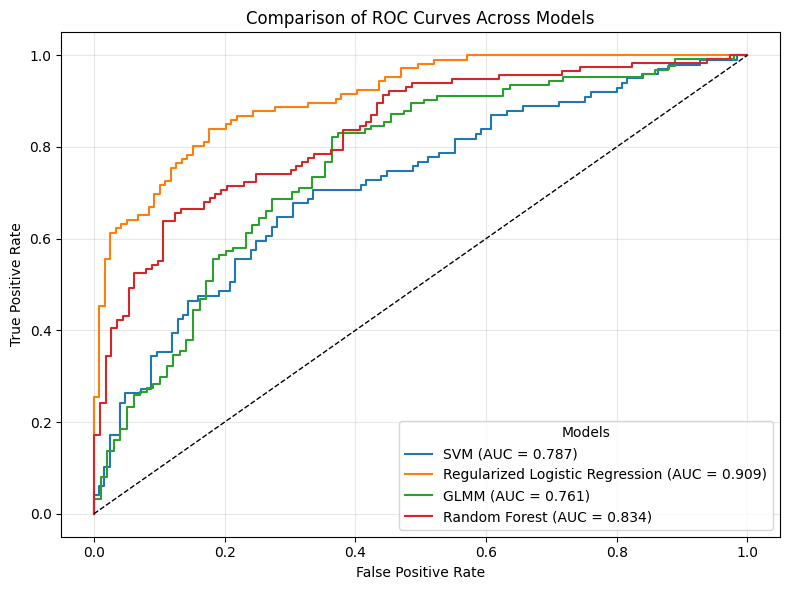

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in each model's ROC data 
svm = pd.read_csv("ROC data/roc_svm.csv")
logistic = pd.read_csv("ROC data/roc_logistic.csv")
glmm = pd.read_csv("ROC data/roc_glmm.csv")
rf = pd.read_csv("ROC data/roc_rf.csv")


# Plot all ROC curves
plt.figure(figsize=(8,6))

plt.plot(svm["FPR"], svm["TPR"], label="SVM (AUC = 0.787)")
plt.plot(logistic["fpr"], logistic["tpr"], label="Regularized Logistic Regression (AUC = 0.909)")
plt.plot(glmm["FPR"], glmm["TPR"], label="GLMM (AUC = 0.761)")
plt.plot(rf["FPR"], rf["TPR"], label="Random Forest (AUC = 0.834)")


plt.plot([0, 1], [0, 1], "k--", lw=1)

# Labels, title, legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Comparison of ROC Curves Across Models")
plt.legend(title="Models")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


## Discussion of Results

We can see that the worst performing model is the SVM with linear kernel, with an AUC score of 0.787. This makes sense, as it does not capture non-linear relationships in the data. The Random Forest model is particularly good at this, and is also much more robust to outliers, which may explain why it performed better with an AUC score of 0.834. The Logistic Mixed effect model performed better than the linear SVM as well, which also we would expect given its ability to account for random effects in the data, as well as hierarchical structures of the data (e.g. same players, teams, venues etc) achieving an AUC of 0.761. In comparison with the logistic regression model without regularisation, the logistic mixed effects model performed just the same achieving the same AUC, which is suprising considering that the addition of random effects did not improve this value. Our best performing model was the Regularized Logistic Regression, with an AUC score of 0.909. One of the benefits of this model is that it can handle a sparse feature space well, as it penalizes the coefficients of less important features, effectively performing feature selection. I think this is particularly useful in our case, as the cricket data set had a large number of features, especially after one-hot encoding the qualitative variables such as venue and team names. 

It's important to note that all of our models were trained on only the first innings and the first 10 overs of the second innings, which is a small proportion of the total match, and therefore we would expect to see even better performance as the match progresses.